In [22]:
# imports (run once)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import spearmanr
import os

sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10, 6)


In [23]:
df=pd.read_csv('model/datasets/features.csv')

In [24]:
# 1) load and basic info
print("shape:", df.shape)
display(df.head())
display(df.dtypes)
print("\nMissing values per column:")
display(df.isna().sum())


shape: (18971, 22)


energy_level  spectral_centroid  spectral_bandwidth  zero_crossing_rate  \
0      0.938428        2544.355903         2713.678054            0.081592   
1      0.927914        2295.910030         2574.582521            0.067589   
2      0.920777        2521.607376         2436.506839            0.110254   
3      0.915981        2918.256625         2472.478711            0.151739   
4      0.919363        2679.651443         2573.253890            0.105469   

   rms_energy     mfcc_1     mfcc_2     mfcc_3     mfcc_4    mfcc_5  ...  \
0    0.256445 -39.406002  57.441074  18.231808  31.000710  1.347786  ...   
1    0.253217 -46.135014  58.124744  13.408034  35.990410  3.619357  ...   
2    0.192597 -50.702988  50.223541  -4.263644  34.478703  3.000490  ...   
3    0.155553 -53.771824  45.529724 -10.467522  25.467491 -0.591861  ...   
4    0.208701 -51.607513  55.035706   6.127437  26.673956  1.652594  ...   

     mfcc_8    mfcc_9   mfcc_10   mfcc_11   mfcc_12   mfcc_13  start  end  \
0  3.941119 -0.847661 -2.659370 -1.646821  1.497536 -1.139711    0.0  3.0   
1  4.772816 -0.908240 -2.519044 -1.487952  1.806934 -0.401992    1.5  4.5   
2  3.799994 -0.332665 -3.321572 -0.321446 -3.958286 -4.860098    3.0  6.0   
3  0.343818  0.155031 -4.524526 -0.983377 -4.949840 -5.308439    4.5  7.5   
4  0.112358 -1.395177 -3.176369 -1.538266 -0.783101 -1.331587    6.0  9.0   

    genre         file_name  
0  hiphop  hiphop.00064.wav  
1  hiphop  hiphop.00064.wav  
2  hiphop  hiphop.00064.wav  
3  hiphop  hiphop.00064.wav  
4  hiphop  hiphop.00064.wav  

[5 rows x 22 columns]

energy_level          float64
spectral_centroid     float64
spectral_bandwidth    float64
zero_crossing_rate    float64
rms_energy            float64
mfcc_1                float64
mfcc_2                float64
mfcc_3                float64
mfcc_4                float64
mfcc_5                float64
mfcc_6                float64
mfcc_7                float64
mfcc_8                float64
mfcc_9                float64
mfcc_10               float64
mfcc_11               float64
mfcc_12               float64
mfcc_13               float64
start                 float64
end                   float64
genre                  object
file_name              object
dtype: object


Missing values per column:


energy_level          0
spectral_centroid     0
spectral_bandwidth    0
zero_crossing_rate    0
rms_energy            0
mfcc_1                0
mfcc_2                0
mfcc_3                0
mfcc_4                0
mfcc_5                0
mfcc_6                0
mfcc_7                0
mfcc_8                0
mfcc_9                0
mfcc_10               0
mfcc_11               0
mfcc_12               0
mfcc_13               0
start                 0
end                   0
genre                 0
file_name             0
dtype: int64

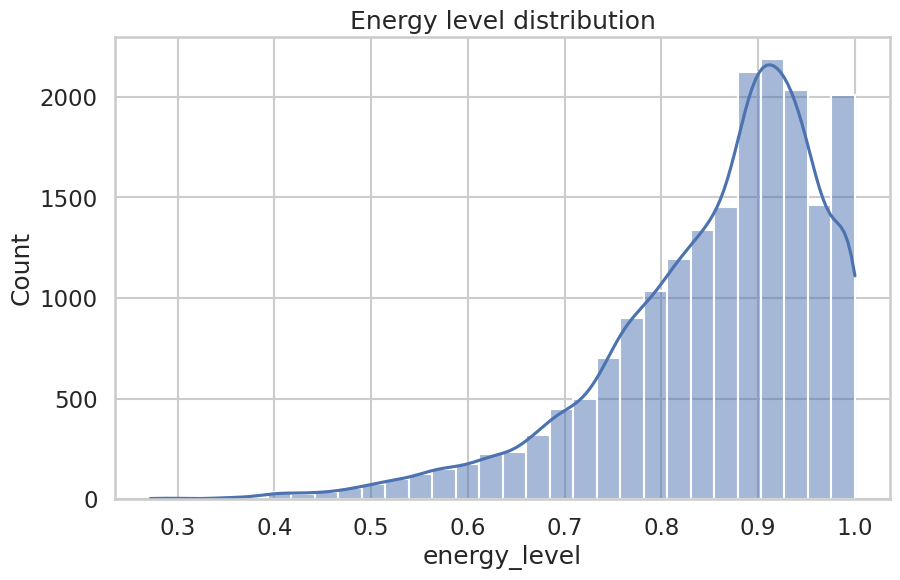

Class counts:


energy_class
1    18252
0      719
Name: count, dtype: int64

energy_class
1    0.9621
0    0.0379
Name: proportion, dtype: float64

In [25]:
plt.figure()
sns.histplot(df["energy_level"], bins=30, kde=True)
plt.title("Energy level distribution")
plt.show()

df["energy_class"] = (df["energy_level"] > 0.6).astype(int)
print("Class counts:")
display(df["energy_class"].value_counts(normalize=False))
display(df["energy_class"].value_counts(normalize=True))


In [26]:
# 3) descriptive statistics
desc = df.select_dtypes(include=[np.number]).describe().T
desc["skew"] = df.select_dtypes(include=[np.number]).skew()
desc["kurtosis"] = df.select_dtypes(include=[np.number]).kurtosis()
display(desc)

count         mean         std         min          25%  \
energy_level        18971.0     0.854966    0.112955    0.271827     0.796259   
spectral_centroid   18971.0  2202.525060  750.207389  479.905803  1632.691450   
spectral_bandwidth  18971.0  2245.093192  541.466588  499.577102  1891.853277   
zero_crossing_rate  18971.0     0.102633    0.045599    0.012733     0.067067   
rms_energy          18971.0     0.130147    0.068139    0.000947     0.083395   
mfcc_1              18971.0   -92.242494   73.120263 -466.030640  -130.394257   
mfcc_2              18971.0    75.644888   25.709923   -9.750558    57.027700   
mfcc_3              18971.0    -7.136637   17.105241  -73.807060   -19.067740   
mfcc_4              18971.0    26.439310   12.374543  -26.834255    17.801358   
mfcc_5              18971.0    -0.705699    9.376023  -37.801102    -7.373240   
mfcc_6              18971.0    11.048589    8.756376  -27.441271     4.492202   
mfcc_7              18971.0    -3.359865    7.659462  -29.125191    -9.311707   
mfcc_8              18971.0     8.104978    7.766289  -29.111811     2.476263   
mfcc_9              18971.0    -4.514123    6.552065  -28.087801    -9.379750   
mfcc_10             18971.0     6.541897    6.205629  -29.334944     2.090093   
mfcc_11             18971.0    -4.163908    5.593111  -38.920776    -8.075731   
mfcc_12             18971.0     4.530605    5.360198  -18.850079     0.732556   
mfcc_13             18971.0    -2.710723    5.129298  -23.988220    -6.495786   
start               18971.0    13.492884    8.212370    0.000000     6.000000   
end                 18971.0    16.492884    8.212370    3.000000     9.000000   
energy_class        18971.0     0.962100    0.190959    0.000000     1.000000   

                            50%          75%          max      skew   kurtosis  
energy_level           0.882988     0.936059     1.000000 -1.217377   1.701222  
spectral_centroid   2215.006348  2709.295005  5432.278843  0.273149  -0.127880  
spectral_bandwidth  2232.744649  2590.322969  3740.963920  0.067794  -0.345364  
zero_crossing_rate     0.097897     0.132681     0.347705  0.647589   0.486773  
rms_energy             0.120552     0.175602     0.447162  0.497113   0.059388  
mfcc_1               -74.887566   -40.922426    78.693962 -1.150931   1.624856  
mfcc_2                72.923859    91.552948   188.132904  0.496719   0.257748  
mfcc_3                -8.330448     4.068347    61.332775  0.253259   0.002170  
mfcc_4                26.867245    35.000210    71.115517 -0.062123  -0.129021  
mfcc_5                -0.508163     6.103067    32.255428 -0.098326  -0.195387  
mfcc_6                11.471990    17.890224    38.744675 -0.193313  -0.419409  
mfcc_7                -3.630070     2.569722    20.458113  0.055557  -0.611303  
mfcc_8                 8.299869    14.161373    53.413063 -0.178452  -0.002862  
mfcc_9                -4.958789     0.525687    24.625504  0.052555  -0.453905  
mfcc_10                6.665035    11.365423    44.051540 -0.167292   0.103853  
mfcc_11               -4.262642    -0.112376    34.081974 -0.047087   0.302989  
mfcc_12                4.510495     8.606030    36.281467 -0.121729  -0.099078  
mfcc_13               -2.578641     0.910468    28.670448  0.090173   0.293693  
start                 13.500000    21.000000    27.000000  0.000258  -1.206354  
end                   16.500000    24.000000    30.000000  0.000258  -1.206354  
energy_class           1.000000     1.000000     1.000000 -4.840285  21.430614

In [27]:
# 4) Pearson and Spearman correlation with energy_level
num = df.select_dtypes(include=[np.number]).columns.tolist()
num.remove("energy_level")
pear_corr = df[num + ["energy_level"]].corr()["energy_level"].drop("energy_level").sort_values(ascending=False)
spearman = {c: spearmanr(df[c], df["energy_level"]).correlation for c in num}
spearman = pd.Series(spearman).sort_values(ascending=False)
print("Top Pearson correlations with energy_level:")
display(pear_corr.head(15))
print("Top Spearman correlations with energy_level:")
display(spearman.head(15))

Top Pearson correlations with energy_level:


mfcc_1                0.998825
rms_energy            0.787006
spectral_centroid     0.676845
spectral_bandwidth    0.606448
zero_crossing_rate    0.583853
energy_class          0.583081
mfcc_10               0.240806
mfcc_8                0.228839
mfcc_12               0.218097
mfcc_9                0.122562
mfcc_6                0.120403
mfcc_7                0.092288
mfcc_11               0.086913
start                 0.038303
end                   0.038303
Name: energy_level, dtype: float64

Top Spearman correlations with energy_level:


mfcc_1                0.999941
rms_energy            0.836156
spectral_centroid     0.712377
zero_crossing_rate    0.672217
spectral_bandwidth    0.598130
energy_class          0.330762
mfcc_10               0.199617
mfcc_12               0.177366
mfcc_8                0.162632
mfcc_9                0.158329
mfcc_11               0.095288
mfcc_7                0.092097
mfcc_6                0.052866
start                 0.044890
end                   0.044890
dtype: float64

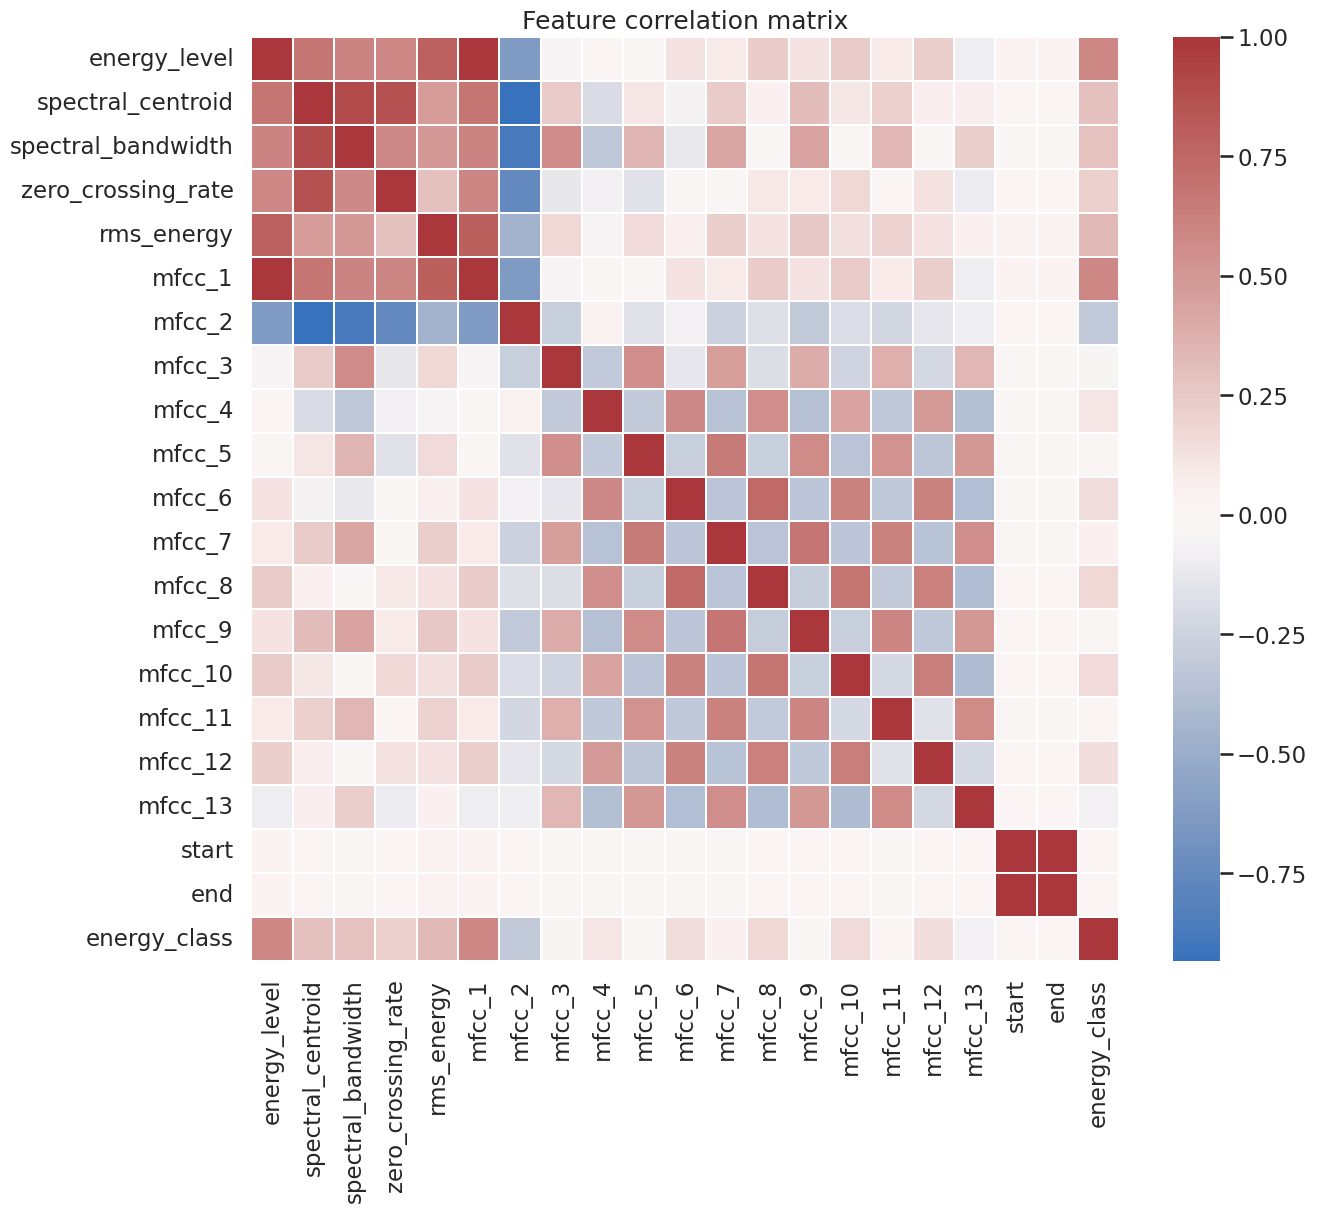

In [28]:
# 5) correlation matrix heatmap (clipped for readability)
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, cmap="vlag", center=0, annot=False, linewidths=0.25)
plt.title("Feature correlation matrix")
plt.show()

In [29]:
# 6) top positively/negatively correlated features lists
top_pos = pear_corr[pear_corr > 0].sort_values(ascending=False).head(10)
top_neg = pear_corr[pear_corr < 0].sort_values().head(10)
print("Top positive features:", list(top_pos.index))
print("Top negative features:", list(top_neg.index))

Top positive features: ['mfcc_1', 'rms_energy', 'spectral_centroid', 'spectral_bandwidth', 'zero_crossing_rate', 'energy_class', 'mfcc_10', 'mfcc_8', 'mfcc_12', 'mfcc_9']
Top negative features: ['mfcc_2', 'mfcc_13', 'mfcc_3', 'mfcc_5']


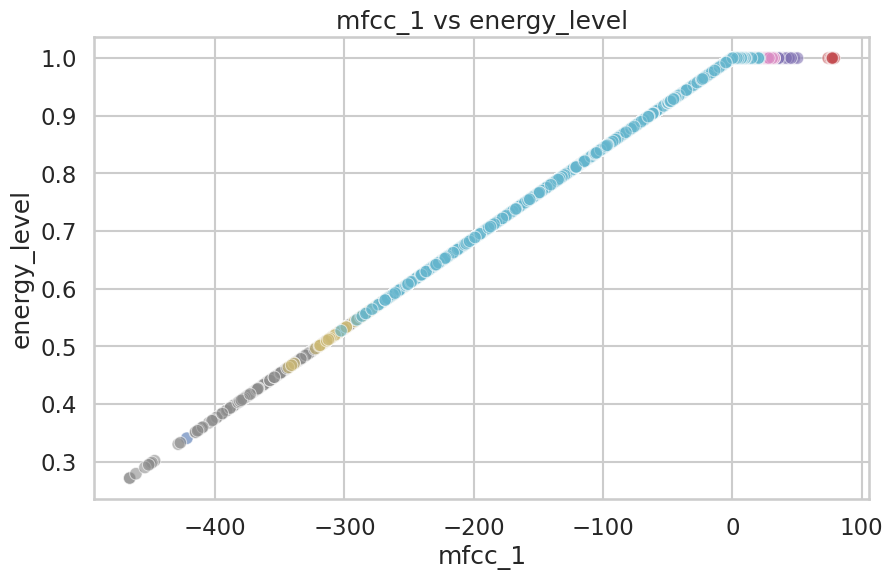

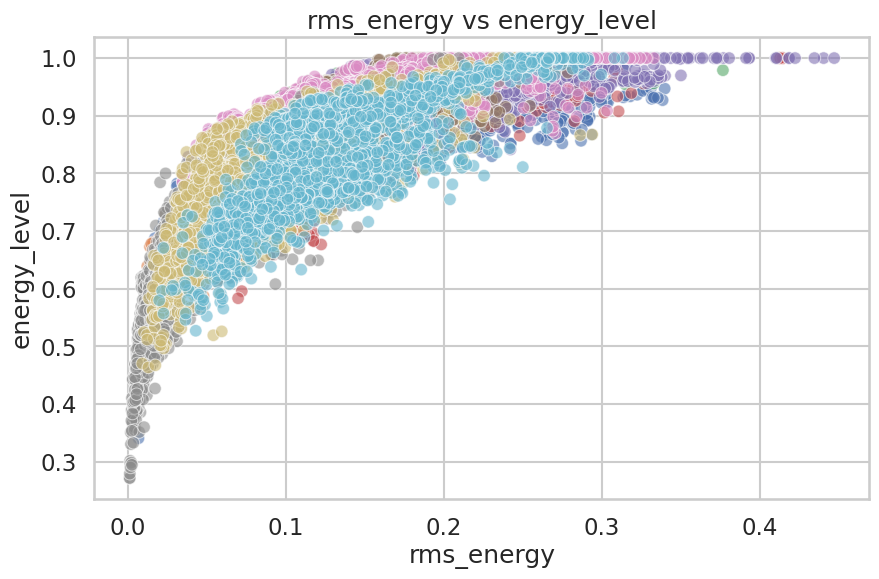

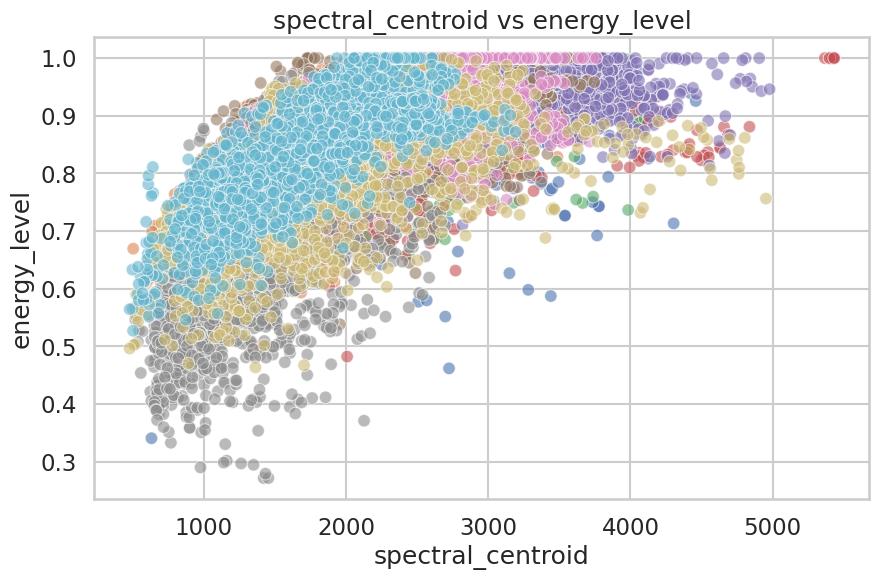

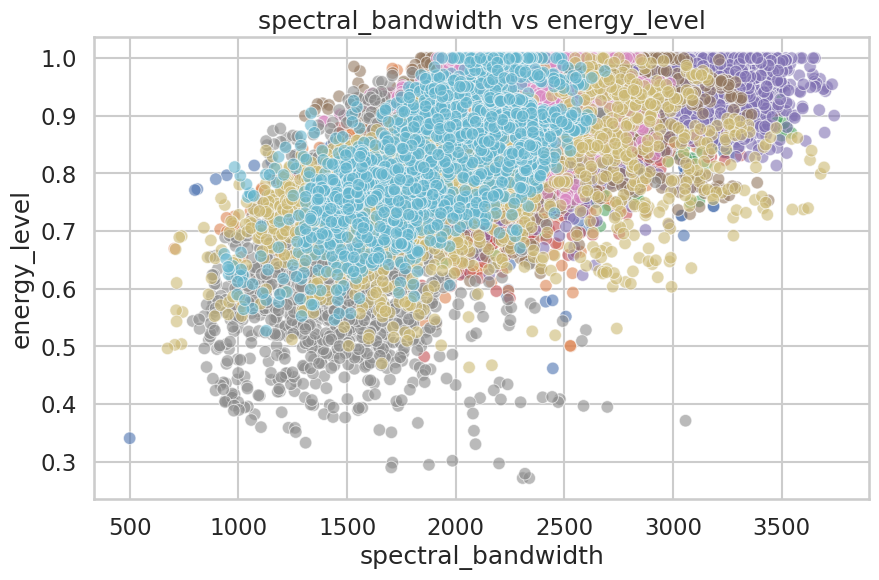

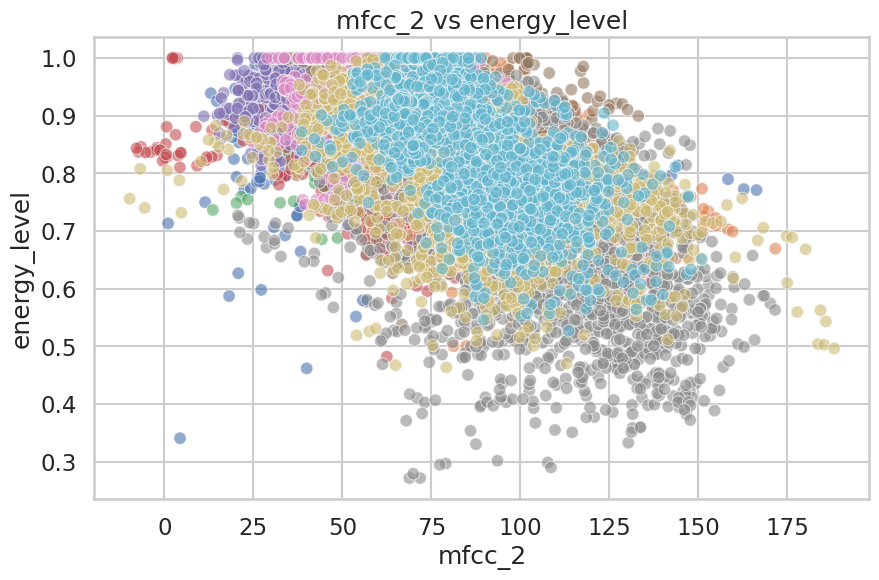

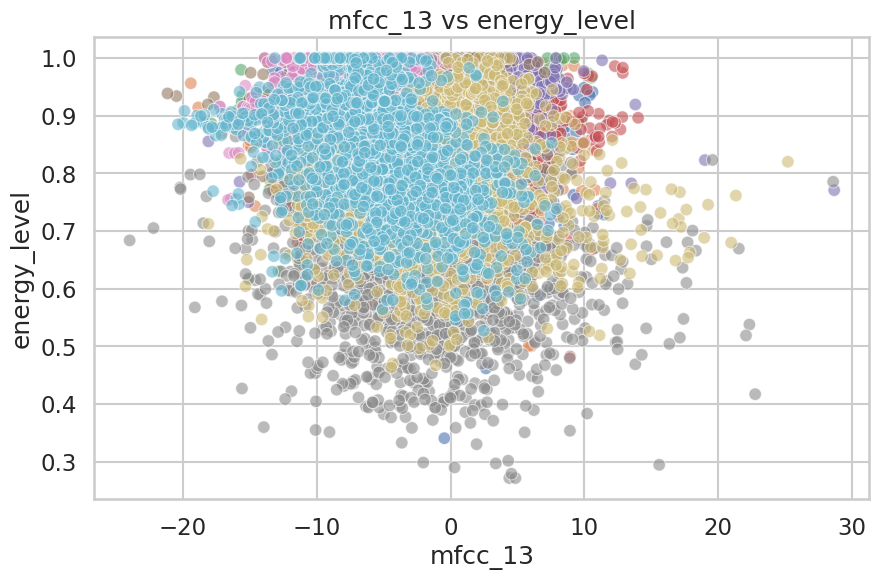

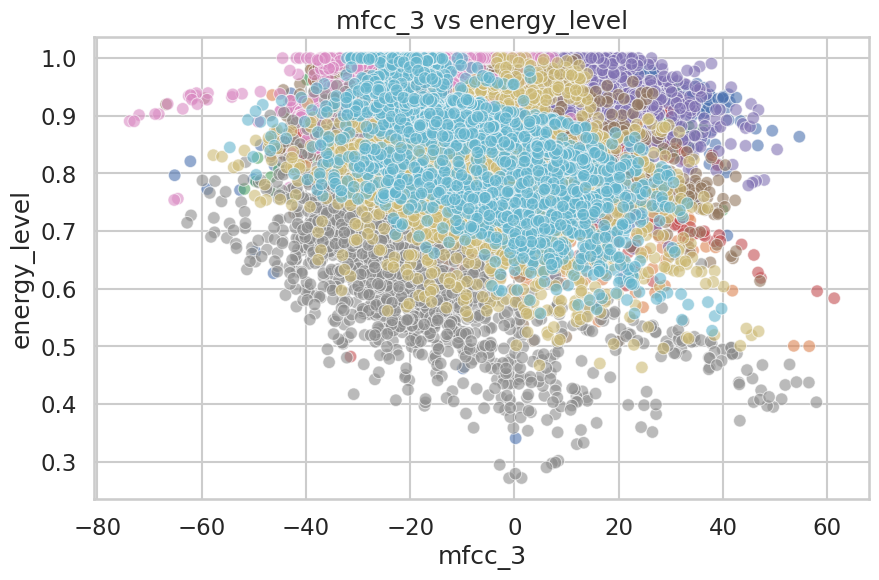

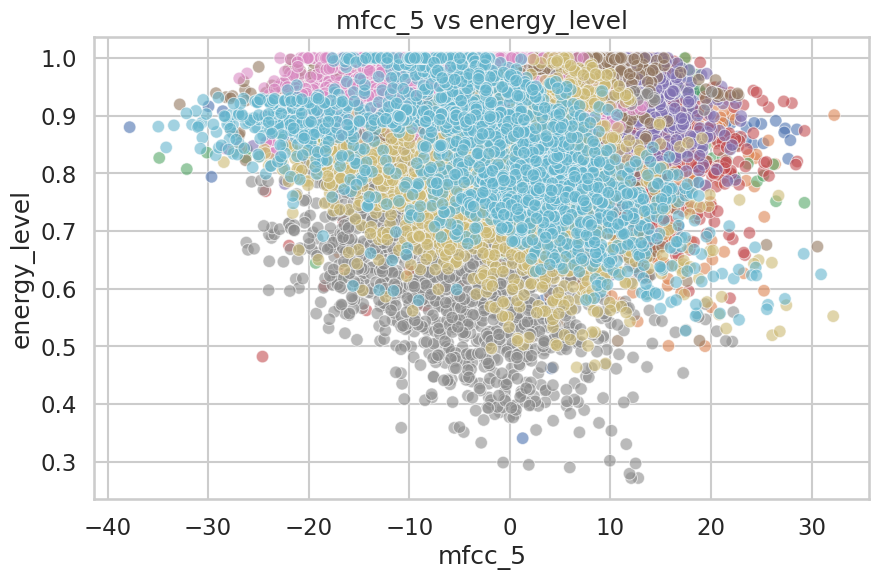

In [30]:
# 7) scatter / jointplots for top features vs energy_level
top_features = list(top_pos.index[:4]) + list(top_neg.index[:4])
for feat in top_features:
    plt.figure()
    sns.scatterplot(x=df[feat], y=df["energy_level"], hue=df.get("genre", None), alpha=0.6, legend=False)
    plt.xlabel(feat); plt.ylabel("energy_level")
    plt.title(f"{feat} vs energy_level")
    fname = feat.replace("/", "_")
    plt.show()

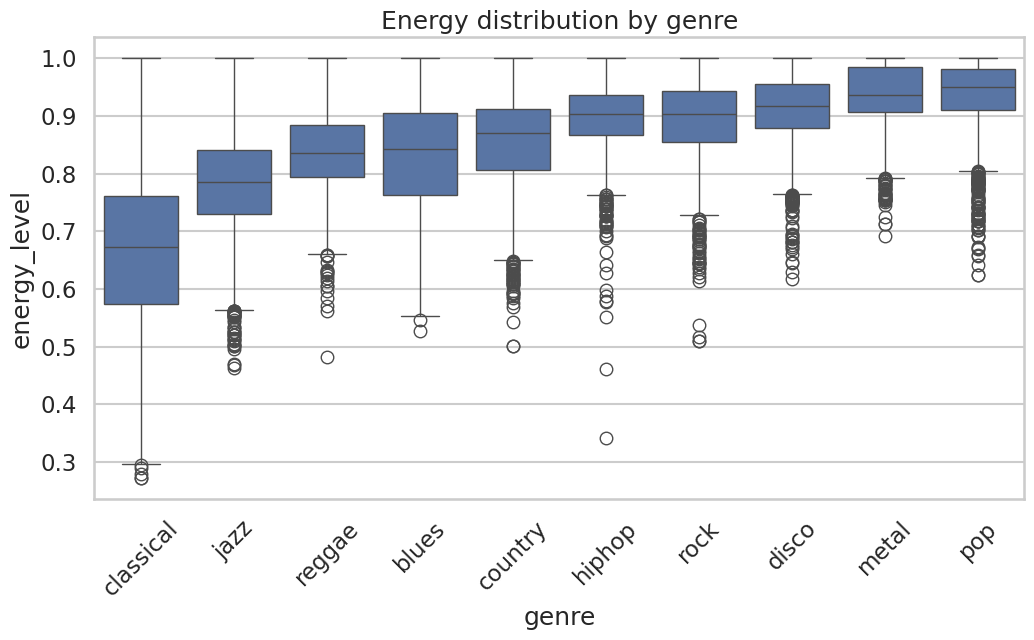

/tmp/ipykernel_138979/1586826555.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_genre = df.groupby("genre").apply(lambda g: g[top_feat].corr(g["energy_level"]))


genre
jazz         0.999996
classical    0.999995
disco        0.999809
blues        0.999613
hiphop       0.999573
country      0.999396
rock         0.999276
pop          0.991781
reggae       0.990251
metal        0.989462
dtype: float64

In [31]:
# 8) boxplots of energy_level by genre (if genre present)
if "genre" in df.columns:
    plt.figure(figsize=(12,6))
    order = df.groupby("genre")["energy_level"].median().sort_values().index
    sns.boxplot(x="genre", y="energy_level", data=df, order=order)
    plt.xticks(rotation=45)
    plt.title("Energy distribution by genre")
    plt.show()

    # per-genre correlations (energy vs top feature)
    top_feat = pear_corr.index[0]
    per_genre = df.groupby("genre").apply(lambda g: g[top_feat].corr(g["energy_level"]))
    display(per_genre.sort_values(ascending=False))

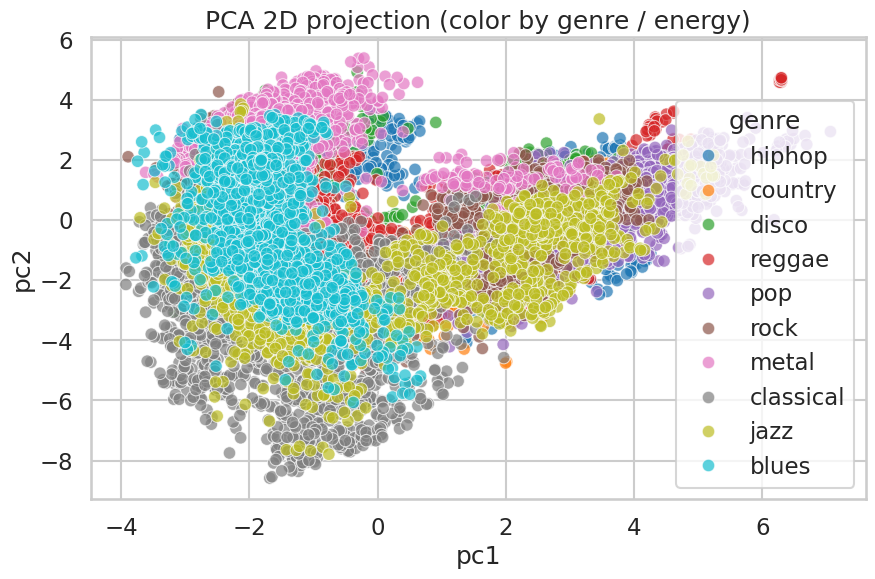

Explained variance ratio (PC1,PC2): [0.282 0.232]


In [32]:
features = df.select_dtypes(include=[np.number]).drop(columns=["energy_level"]).fillna(0)
scaler = StandardScaler()
Xs = scaler.fit_transform(features)
pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(Xs)
df["pc1"] = pcs[:,0]; df["pc2"] = pcs[:,1]

plt.figure()
sns.scatterplot(x="pc1", y="pc2", hue=df.get("genre", df["energy_level"]), palette="tab10", data=df, alpha=0.7, legend="brief")
plt.title("PCA 2D projection (color by genre / energy)")
plt.show()
print("Explained variance ratio (PC1,PC2):", pca.explained_variance_ratio_.round(3))

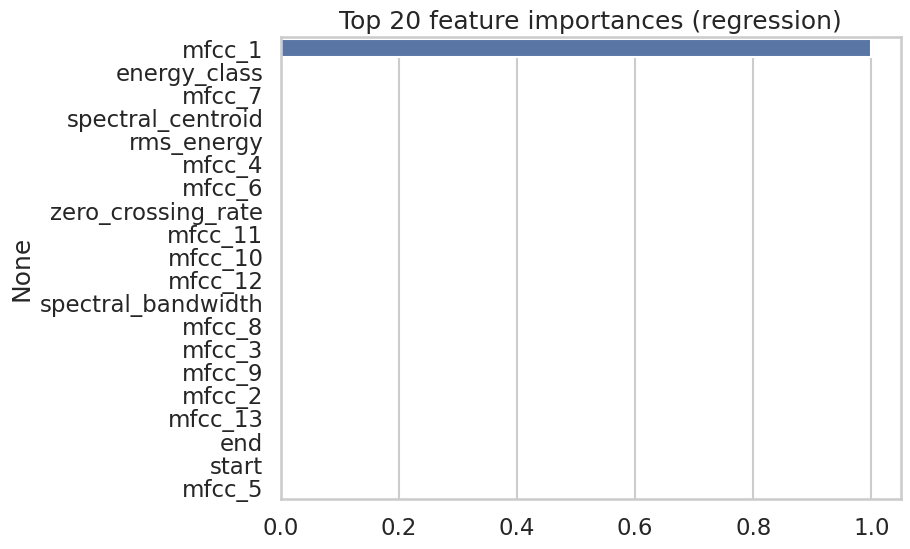

In [33]:
# 10) Feature importance: RandomForest regressor (predict energy_level) and classifier (energy_class)
X = features
y_reg = df["energy_level"]
y_cls = df["energy_class"]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.25, random_state=0, stratify=df.get("genre", None))
rfr = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1)
rfr.fit(X_train, y_reg_train)
importances_reg = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=importances_reg.head(20).values, y=importances_reg.head(20).index)
plt.title("Top 20 feature importances (regression)")
plt.show()


In [34]:
vif_df = pd.DataFrame()
vif_df["feature"] = features.columns
vif_df["VIF"] = [variance_inflation_factor(Xs, i) for i in range(Xs.shape[1])]
vif_df = vif_df.sort_values("VIF", ascending=False)
display(vif_df.head(30))

/home/guy_who_likes_to_code/anaconda3/envs/m/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


feature        VIF
18                 end        inf
17               start        inf
0    spectral_centroid  58.161190
1   spectral_bandwidth  37.410796
2   zero_crossing_rate  17.855314
5               mfcc_2  15.095810
4               mfcc_1  11.303613
3           rms_energy   4.900897
6               mfcc_3   4.454700
11              mfcc_8   3.049948
9               mfcc_6   2.860472
10              mfcc_7   2.684138
7               mfcc_4   2.500985
13             mfcc_10   2.483356
15             mfcc_12   2.374613
8               mfcc_5   2.340562
12              mfcc_9   2.335684
14             mfcc_11   2.161018
16             mfcc_13   2.065112
19        energy_class   1.910585

In [35]:
# 12) Compact textual summary (auto)
summary = {
    "n_samples": int(df.shape[0]),
    "n_genres": int(df["genre"].nunique()) if "genre" in df.columns else None,
    "energy_mean": float(df["energy_level"].mean()),
    "energy_median": float(df["energy_level"].median()),
    "energy_std": float(df["energy_level"].std()),
    "top_pos_corr": list(top_pos.index[:10]),
    "top_neg_corr": list(top_neg.index[:10]),
    "pca_explained_pc1": float(pca.explained_variance_ratio_[0]),
    "pca_explained_pc2": float(pca.explained_variance_ratio_[1]),
}
display(pd.Series(summary))

n_samples                                                        18971
n_genres                                                            10
energy_mean                                                   0.854966
energy_median                                                 0.882988
energy_std                                                    0.112955
top_pos_corr         [mfcc_1, rms_energy, spectral_centroid, spectr...
top_neg_corr                         [mfcc_2, mfcc_13, mfcc_3, mfcc_5]
pca_explained_pc1                                             0.281861
pca_explained_pc2                                             0.232234
dtype: object